In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('placas_kabum_tratado_3.xlsx')

print(df)

                                                  nome        valor  \
0    Placa de Vídeo RX 6600 CLD 8G ASRock AMD Radeo...  R$ 1.599,90   
1    Placa de Vídeo RX 7600 GAMING OC 8G AMD Radeon...  R$ 1.999,99   
2    Placa de Vídeo RX 6750XT Gaming XFX Graphics C...  R$ 2.599,99   
3    Placa de Vídeo RX 6650XT XFX Speedster SWFT210...  R$ 1.879,99   
4    Placa de Video RTX 4060 Infinity 2 Palit NVIDI...  R$ 2.299,99   
..                                                 ...          ...   
487  Placa de Video 1Gb GT710 Ddr3 64bit Vga/Dvi/Hd...    R$ 323,83   
488  Placa de Vídeo AFOX GeForce GTX750TI, 2GB, GDD...  R$ 1.004,40   
489  Placa de Vídeo Gainward NVIDIA GeForce GTX 166...  R$ 5.592,00   
490  Adaptador Para Duas Fontes E Mineração Psuad 2...     R$ 21,90   
491  Bloco VGA Barrow Para Rtx 3080 (ti) E Rtx 3090...    R$ 599,00   

     valor_float        gpu     marca  vram_gb  pontuacao_gpu  pontuacao_vram  \
0        1599.90    RX 6600    ASROCK      NaN             75     

In [3]:

placas_validas = df[df["gpu"].notnull()]

# Estilo dos gráficos
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (12, 6)

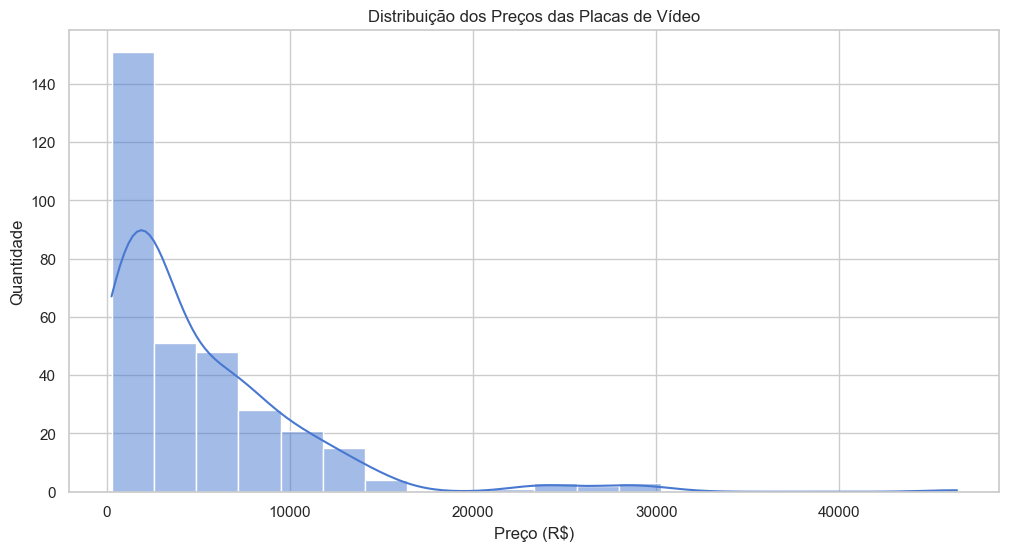

In [4]:
# Distribuição de Preços
plt.figure()
sns.histplot(placas_validas["valor_float"], bins=20, kde=True)
plt.title("Distribuição dos Preços das Placas de Vídeo")
plt.xlabel("Preço (R$)")
plt.ylabel("Quantidade")
plt.show()

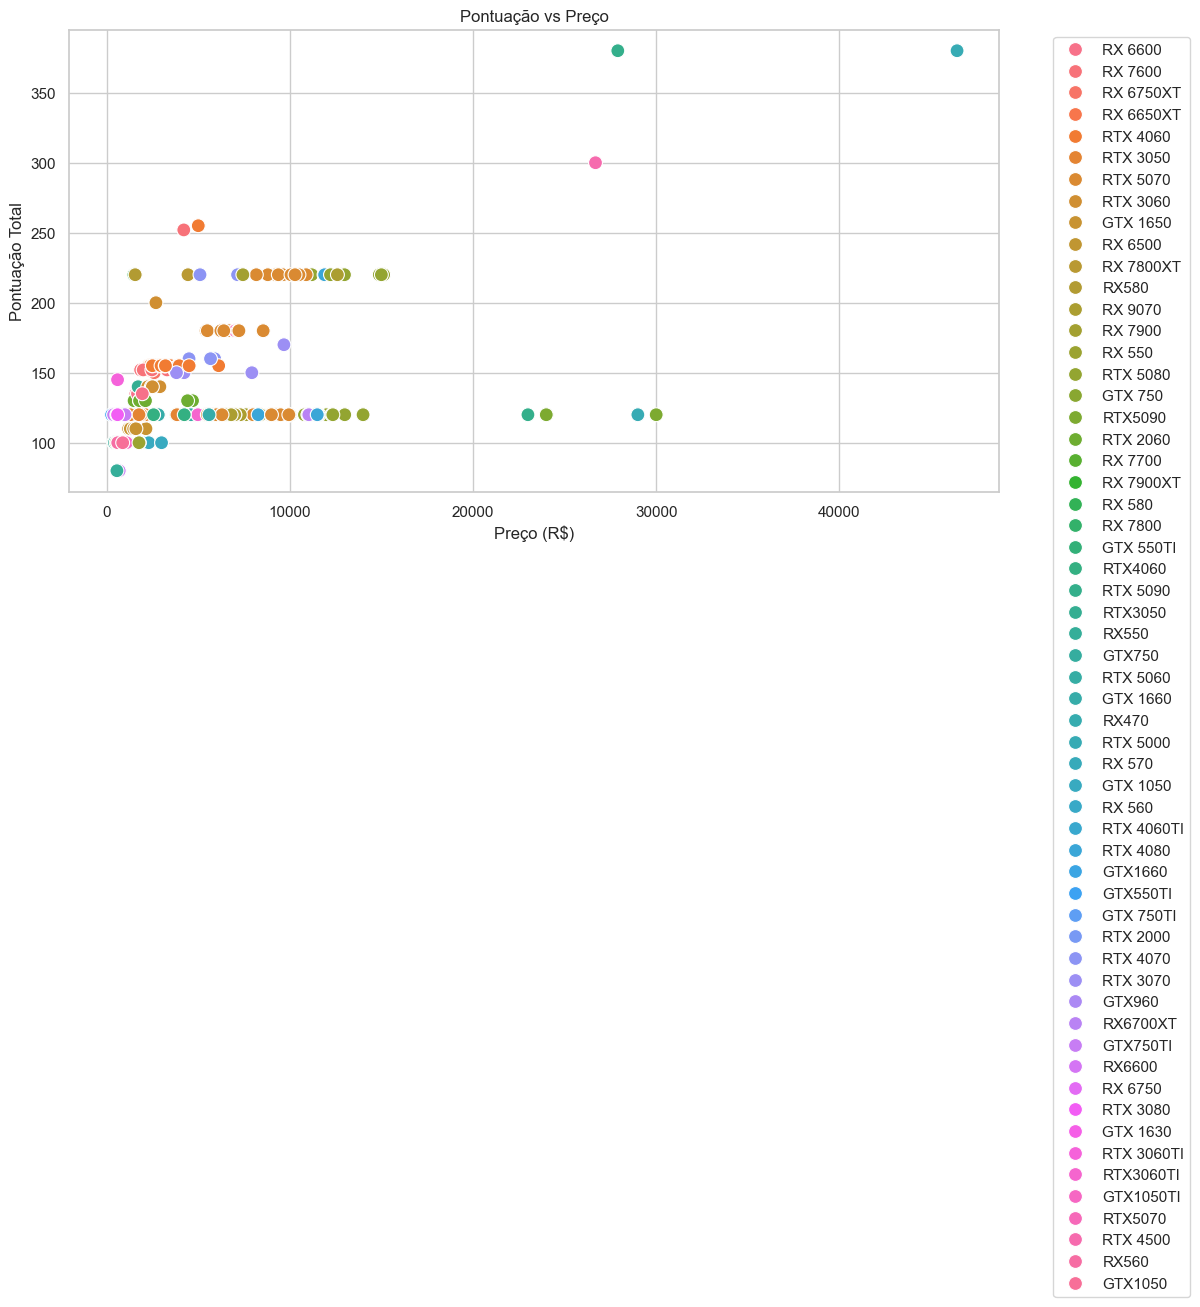

In [5]:
# Dispersão
plt.figure()
sns.scatterplot(
    x="valor_float",
    y="pontuacao_total",
    hue="gpu",
    data=placas_validas,
    s=100
)
plt.title("Pontuação vs Preço")
plt.xlabel("Preço (R$)")
plt.ylabel("Pontuação Total")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

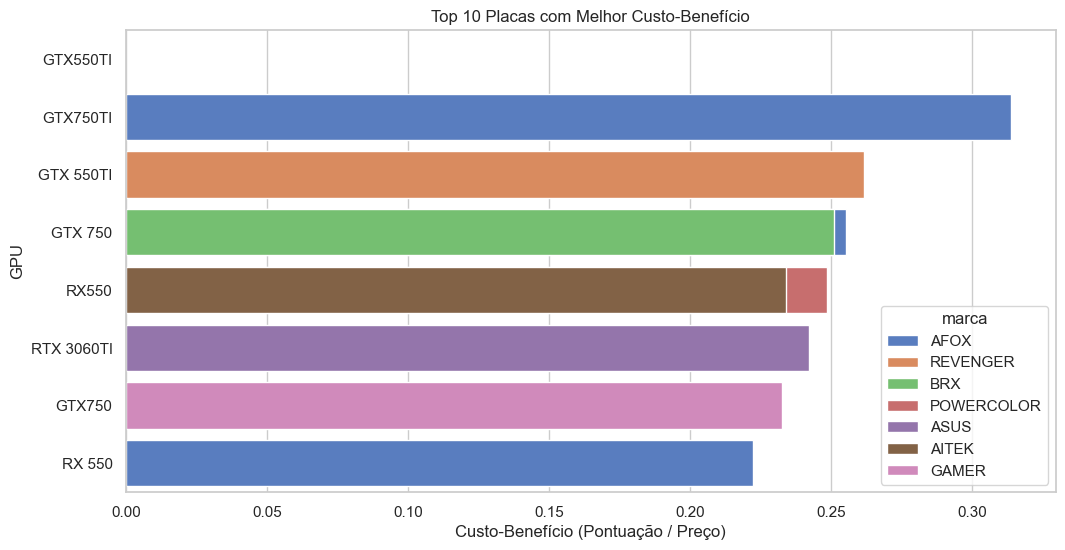

In [6]:
# Barras
top10_cb = placas_validas.sort_values(by="custo_beneficio", ascending=False).head(10)
plt.figure()
sns.barplot(
    x="custo_beneficio",
    y="gpu",
    data=top10_cb,
    hue="marca",
    dodge=False
)
plt.title("Top 10 Placas com Melhor Custo-Benefício")
plt.xlabel("Custo-Benefício (Pontuação / Preço)")
plt.ylabel("GPU")
plt.show()

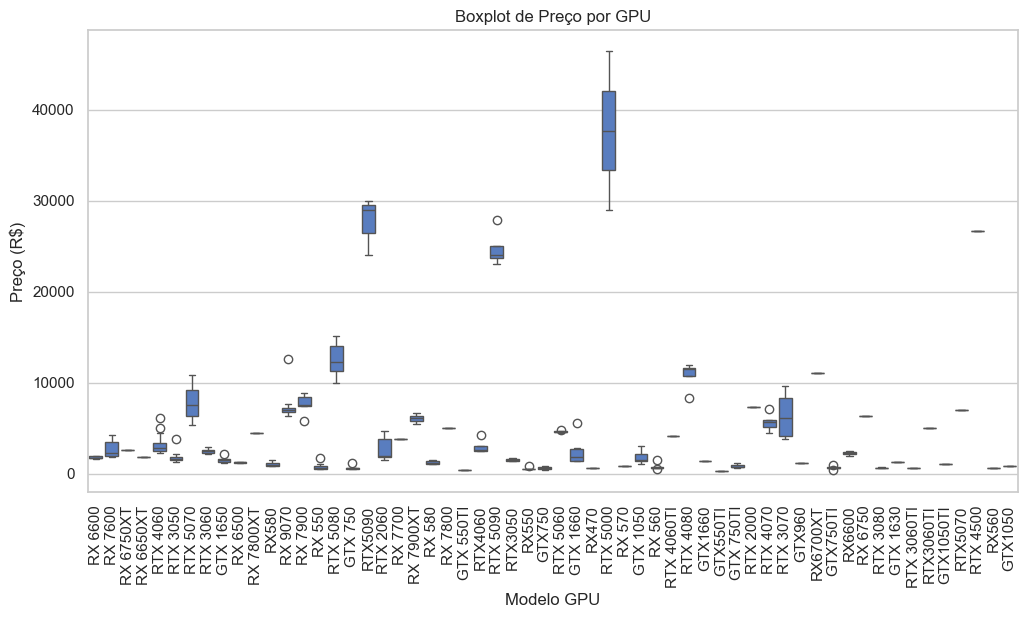

In [8]:
# Boxplot
plt.figure()
sns.boxplot(x="gpu", y="valor_float", data=placas_validas)
plt.title("Boxplot de Preço por GPU")
plt.xlabel("Modelo GPU")
plt.ylabel("Preço (R$)")
plt.xticks(rotation=90)
plt.show()